El siguiente código genera una señal (hipótesis) binaria compleja que permite modificar la probabilidad de ocurrencia de los valores binarios: 

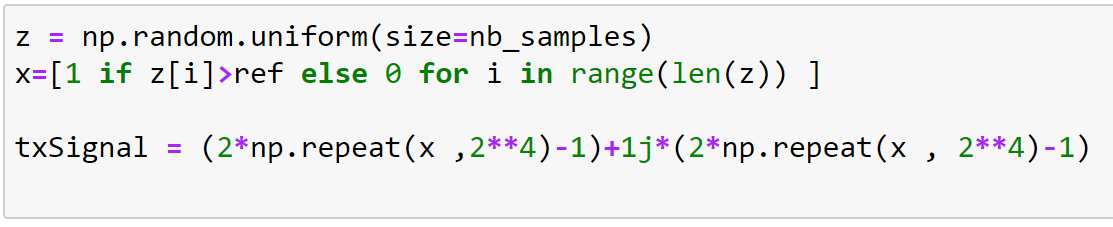

Inicialmente configure el valor de la variable ref a un valor de 0.5 .

1.- Realizar  un gráfica temporal y el histograma de cada una de las componentes de la señal. Describa con sus propias palabras lo que observa de las gráficas.

Considerando la siguiente configuración del SDR:

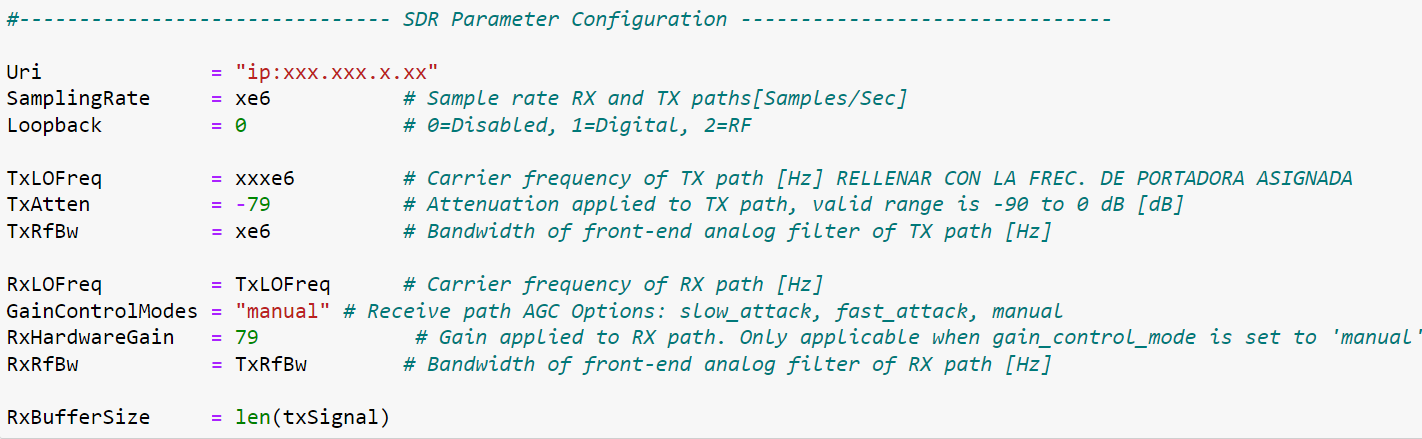

2. Realice una transmisión y recepción de la señal usando el SDR a través del medio inalámbrico. Normalice la señal recibida de forma tal que tenga potencia unitaria y realice una gráfica temporal y su correspondiente histograma tanto de la componente en fase como en cuadratura. Describa con sus propias palabras lo que observa de las gráficas.

3. Repita los pasos anteriores pero ahora aumentando la potencia de la señal transmitida, esto es llevando el valor de la variable TxAtten al valor -70. Describa con sus propias palabras lo que observa en el histograma de la señal comparandola con lo anteriormente obtenido.

4. Modifique el código para enviar una hipotesis  $H \in \{ -3,-1,+1,+3\}$   con igual probabilidades . Muestre el histograma de la señal recibida por el SDR.  Describa con sus propias palabras lo que observa en la gráfica.

RESPUESTA: Señal a modo ilustrativo de lo que se espera recibir para el punto 2:

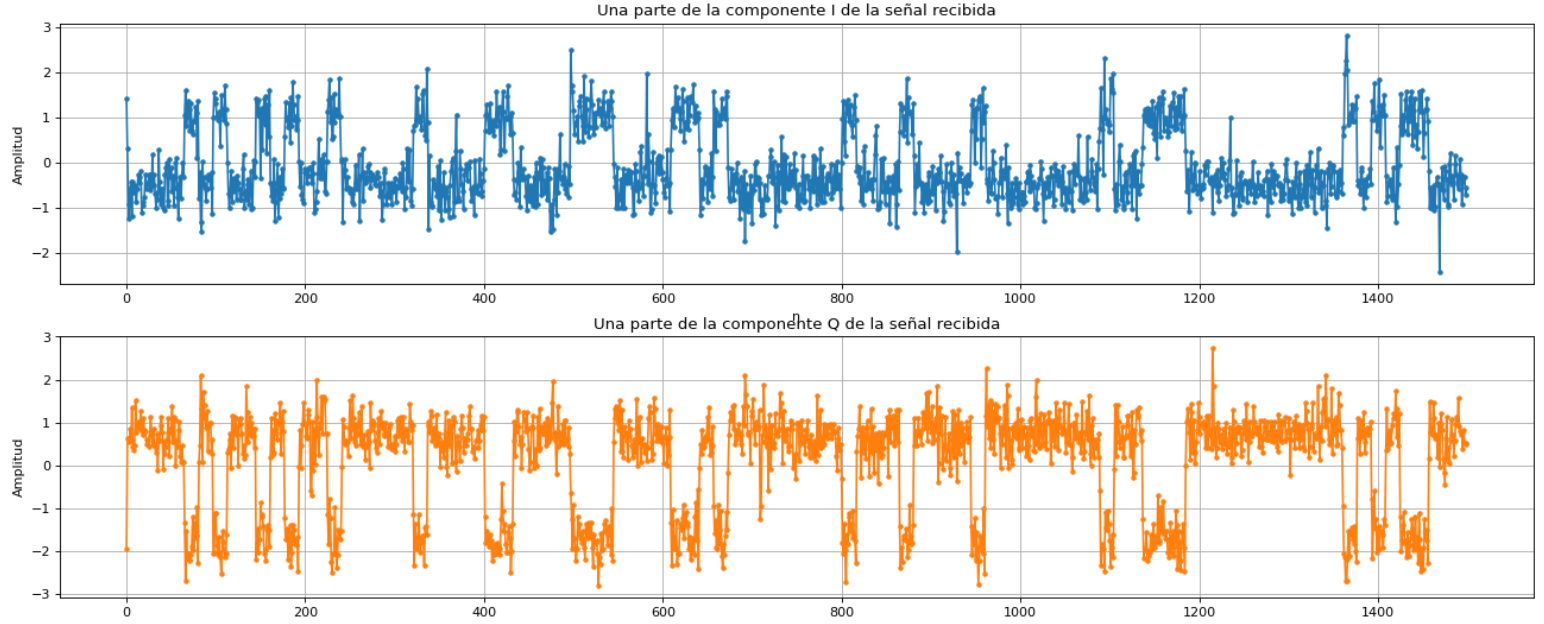

# Resultados
---
Configuración previa.
+ Inicialización de la Variable 'Ref'
+ Definición de funciones que crean la señal enviada Tx

In [15]:
import adi
import numpy as np
import matplotlib.pyplot as plt
Uri = "ip:192.168.1.32"
sdr  = adi.Pluto(Uri)

nSamples     = 2**20
samplingRate = 2.0e6
frec         = samplingRate/8
Ref = 0.5

z = np.random.uniform(size = nSamples)
x = [1 if z[n] > Ref else 0 for n in range(len(z))]
txSignal = (2*np.repeat(x,2**4)-1)+1j*(2*np.repeat(x,2**4)-1)



+ Definición de funciones que grafican de la señal enviada Tx

In [16]:
def plotSignal(signal):
#------------------------------- Transmitted I component ------------------------------- 
# Plot time domain
    plt.figure(figsize=(20,8), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(np.real(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en fase de la señal')
    plt.grid()
#------------------------------- Transmitted Q component -------------------------------
# Plot time domain
    plt.subplot(2,1,2)
    plt.plot(np.imag(signal))
    plt.xlabel('n')
    plt.ylabel('Amplitud')
    plt.title('Componente en cuadratura de la señal')
    plt.grid()
    plt.show()

+ Definición de la función de densidad espectral
+ Parametros de configuración del SDR
+ Envío de una señal, y recepción


In [17]:
def plotSpect(signal,samplingRate):
    plt.subplots(figsize=(15, 3))
    plt.grid()
    plt.title("Power Spectral Density")
    plt.psd(signal, len(signal), samplingRate, color='C1')
    plt.show()

#------------------------------- SDR Parameter Configuration -------------------------------

Uri              = Uri
Loopback         = 0             # 0=Disabled, 1=Digital loopback, 2=Retransmiter
SamplingRate     = samplingRate  # Sample rate RX and TX paths[Samples/Sec]

TxLOFreq         = 938e6         # Carrier frequency of TX path [Hz]
TxAtten          = -79          # Attenuation applied to TX path, valid range is -89 to 0 dB [dB]
TxRfBw           = 2.0e6         # Bandwidth of front-end analog filter of TX path [Hz]
RxBufferSize     = nSamples      # Depend on the length of the transmit signal. Maximum tx buffer size 2**24[samples]
tx_cyclic_buffer = False

RxLOFreq         = TxLOFreq      # Carrier frequency of RX path [Hz]
GainControlModes = "manual" # Receive path AGC Options: slow_attack, fast_attack, manual
RxHardwareGain   = 79           # Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'    
RxRfBw           = TxRfBw        # Bandwidth of front-end analog filter of RX path [Hz] 
RxBufferSize     = len(txSignal)      # Rx Buffer size. Maximun value 2**28 [Samples]

#------------------------------- Transmitter ------------------------------- 
sdr.tx(txSignal*(2**15-1)) # The PlutoSDR expects samples to be between -2^15-1 and +2^15-1, not -1 and +1 like some SDRs

#------------------------------- Receiver ------------------------------- 
rxSignal = sdr.rx()

1. Gráfica Temporal e Histograma

En la gráfica temporal puede verse cómo la señal (Tx) que se está enviando tiene una componente real y otra imaginaria, estas son idénticas. 

Y en el histograma puede verse que los valores enviados, por cada componente, fueron sólo 1s y -1s


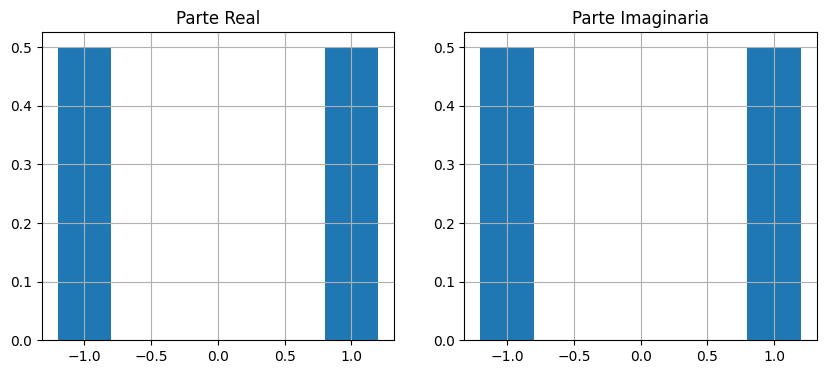

In [41]:
Sreal = np.real(txSignal)
Simag = np.imag(txSignal)

plotSignal(txSignal[0:400])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.grid()
plt.title("Parte Real")
plt.hist(Sreal,density=True,bins = 3,range=(-1.5,1.5),rwidth=0.4)

plt.subplot(1,2,2)
plt.grid()
plt.title("Parte Imaginaria")
plt.hist(Simag,density=True,bins = 3,range=(-1.5,1.5),rwidth=0.4)

plt.show()


### Ejecutar el Final

In [19]:
# Since it is not possible to turn off Tx, it is configured to transmit at low power and on a different frequency than Rx.
sdr.tx_destroy_buffer()
sdr.tx_hardwaregain_chan0 = -89 
sdr.tx_lo                 = int(2400e6)
sdr.rx_lo                 = int(950e6)
sdr.tx(np.zeros(2048))

# Destroy radio object
del(sdr)